# Linear Programming

The package linprog() in scipy solves only minimization (not maximization) problems and doesn’t allow inequality constraints with the greater than or equal to sign (≥). To work around these issues, you need to modify your problem before starting optimization into the following form:

$$
\begin{array}{ll}
\text{minimize} & \textbf{c}\cdot \textbf{x}  \\
\text{subject to} & \textbf{A} \cdot \textbf{x} \leq \textbf{b} 
\end{array}
$$

Example: 
$$
\begin{array}{lrrrl}
\text{maximize} & x_1 & + &x_2 & \\
\text{subject to} & 4x_1 & - &x_2 &\leq 8 \\
& 2x_1 &- &x_2 &\leq 10 \\
& 5x_1 & - &2x_2 &\geq -2 \\
&&& x_1 &\geq 0 \\
&&& x_2 &\geq 0
\end{array}
$$

Maximizing $f(x_1,x_2, \ldots, x_n)$ with a set of constraints is equivalent to minimizing $-f(x_1,x_2,\ldots,x_n)$.
Converting the above LP problem to the standard form, we get
$$
\begin{array}{lrrrl}
\text{minimize} & -x_1 & - &x_2 & \\
\text{subject to} & 4x_1 & - &x_2 &\leq 8 \\
& 2x_1 &- &x_2 &\leq 10 \\
& -5x_1 &+ &2x_2 &\leq 2 \\
&&& -x_1 &\leq 0 \\
&&& -x_2 &\leq 0
\end{array}
$$
That is,
$$
\textbf{A}=
  \begin{bmatrix}
    4 & -1 \\
    2 & 1 \\
    -5 & 2 \\
    -1 & 0 \\
    0 & -1 \\
  \end{bmatrix}
$$
\
$$
\textbf{b} = 
\begin{bmatrix}
8 \\ 10 \\ 2 \\ 0 \\ 0
\end{bmatrix}
$$
\
$$
\textbf{c} =
\begin{bmatrix}
-1 \\ -1
\end{bmatrix}
$$
\
$$\textbf{x} =
\begin{bmatrix}
x_1 \\ x_2
\end{bmatrix}
$$

In [1]:
# Import required libraries
import numpy as np
from scipy.optimize import linprog

# Set the inequality constraints matrix
# Note: the inequality constraints must be in the form of <=
A = np.array([[4, -1], [2, 1], [-5, 2], [-1, 0], [0, -1]])

# Set the inequality constraints vector
b = np.array([8, 10, 2, 0, 0])

# Set the coefficients of the linear objective function vector
c = np.array([-1, -1])

# Solve linear programming problem
sol = linprog(c, A_ub=A, b_ub=b)

C:\Users\91817\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [2]:
# Print results
print('Optimal value:', -round(sol.fun, ndigits=2),
      '\nx values:', [round(x, ndigits=2) for x in sol.x],
      '\nNumber of iterations in simplex:', sol.nit,
      '\nStatus:', sol.message)

Optimal value: 8.0 
x values: [2.0, 6.0] 
Number of iterations in simplex: 4 
Status: Optimization terminated successfully.


# More on coversions

## Equalities

An equality $\textbf{a}\cdot \textbf{x} = b$ can be replaced with the following two inequalities:

\begin{align*}
\textbf{a}\cdot \textbf{x} &\leq b\\
-\textbf{a}\cdot \textbf{x} &\leq -b
\end{align*}

For example, $2x_1 + 4x_2 - 3x_3 = 5$ is equivalent to the following two inequalities:

\begin{align*}
2x_1 + 4x_2 - 3x_3 &\leq 5 \\
-2x_1 - 4x_2 + 3x_3 &\leq -5 
\end{align*}

## Free variables

Suppose a variable $x$ could be either non-negative or negative. Such a variable is referred to as a free variable. To take of this, let $x = x' - x''$ for $x' \leq 0$ and $x''\leq 0$, and replace every occurrence of $x$ in the objective function and the constrain matrix with $x'-x''$. To see the equivalence, it suffices to note that the difference of two non-positive variables could be either non-negative or negative.

For example, consider the following LP:
\begin{equation*}
\begin{array}{lrrrrrlr}
\text{minimize} & 2x &-& 3y &+& 5z &&\\
\text{subject to} & 7x &-& 5y &+& 6z &\leq& 10 \\
&-2x &+& 8y &-&4z &\leq& 3 \\
&9x &-& 2y &-& 5z &\leq& 4 \\
&&&&&-y &\leq& 0 \\
&&&&&-z &\leq& 0
\end{array}
\end{equation*}
 
Here the variable $x$ is a free variable. Replacing $x$ with $x'-x''$ we get the following equivalent LP:

\begin{equation*}
\begin{array}{lrrrrrrrlr}
\text{minimize} & 2x' &-& 2x'' &-& 3y &+& 5z &&\\
\text{subject to} & 7x' &-& 7x'' &-& 5y &+& 6z &\leq& 10 \\
&-2x' &+& 2x'' &+& 8y &-&4z &\leq& 3 \\
&9x' &-& 9x'' &-& 2y &-& 5z &\leq& 4 \\
&&&&&&&x' &\leq& 0 \\
&&&&&&&x'' &\leq& 0 \\
&&&&&&&-y &\leq& 0 \\
&&&&&&&-z &\leq& 0
\end{array}
\end{equation*}

# An example from the slide

In [3]:
# Import required libraries
import numpy as np
from scipy.optimize import linprog

A = np.array([[1, 1, 3], [2, 2, 5], [4, 1, 2], [-1, 0, 0], [0, -1, 0], [0, 0, -1]])

# Set the inequality constraints vector
b = np.array([30, 24, 36, 0, 0, 0])

# Set the coefficients of the linear objective function vector
c = np.array([-3, -1, -2])

# Solve linear programming problem
sol = linprog(c, A_ub=A, b_ub=b)

In [4]:
# Print results
print('Optimal value:', -round(sol.fun, ndigits=2),
      '\nx values:', [round(x, ndigits=2) for x in sol.x],
      '\nNumber of iterations in simplex:', sol.nit,
      '\nStatus:', sol.message)

Optimal value: 28.0 
x values: [8.0, 4.0, 0.0] 
Number of iterations in simplex: 6 
Status: Optimization terminated successfully.


In [5]:
# Import required libraries
import numpy as np
from scipy.optimize import linprog

# Set the inequality constraints matrix
# Note: the inequality constraints must be in the form of <=
A = np.array([[4, -1], [2, 1], [-5, 2], [-1, 0], [0, -1]])

# Set the inequality constraints vector
b = np.array([8, 10, 2, 0, 0])

# Set the coefficients of the linear objective function vector
c = np.array([-1, -1])

# Solve linear programming problem
sol = linprog(c, A_ub=A, b_ub=b)

In [6]:
# Print results
print('Optimal value:', -round(sol.fun, ndigits=2),
      '\nx values:', [round(x, ndigits=2) for x in sol.x],
      '\nNumber of iterations in simplex:', sol.nit,
      '\nStatus:', sol.message)


Optimal value: 8.0 
x values: [2.0, 6.0] 
Number of iterations in simplex: 4 
Status: Optimization terminated successfully.


In [7]:
import numpy as np
from scipy.optimize import linprog
edges = 9
# 0 1 2 3 4 5 6 7 8
conservation = np.array([[ 0,-1, 0, 0, 1, 1, 0, 0, 0], # B
[-1, 0, 1, 1, 0, 0, 0, 0, 0], # C
[ 0, 0, 0,-1, 0,-1,-1, 0, 1], # D
[ 0, 0,-1, 0,-1, 0, 1, 1, 0]]) # E
# 0 1 2 3 4 5 6 7 8
sinks = np.array([0, 0, 0, 0, 0, 0, 0, 1, 1])
# 0 1 2 3 4 5 6 7 8
capacity = np.array([4, 3, 1, 1, 3, 1, 3, 1, 5])
res = linprog(-sinks,
A_eq=conservation,
b_eq=np.zeros(conservation.shape[0]),
A_ub=np.eye(edges),
b_ub=capacity)
print(res)


     con: array([-4.50389503e-10, -4.50386617e-10,  9.00773678e-10, -1.99840144e-15])
     fun: -4.999999997267144
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([ 2.00000000e+00,  1.92359417e-09, -1.22243105e-10,  4.81123141e-10,
        6.96208571e-01,  3.03791430e-01,  4.21934063e-01,  2.74274508e-01,
        7.25725495e-01])
  status: 0
 success: True
       x: array([2.        , 3.        , 1.        , 1.        , 2.30379143,
       0.69620857, 2.57806594, 0.72572549, 4.27427451])


In [8]:
# Python program for implementation of Edmonds-Karp algorithm
from collections import defaultdict

# This class represents a directed graph
# using adjacency matrix representation
class Graph:

    def __init__(self, graph):
        self.graph = graph # residual graph
        self.row = len(graph)

    '''
    Return true if there is a path from source 's' to sink 't' in
    a residual graph. Fill parent[] to store the path 
    '''

    def BFS(self, s, t, parent):

        # Mark all the vertices as not visited
        visited = [False] * (self.row)

        # Create a queue for BFS
        queue = []

        # Mark the source node as visited and enqueue it
        queue.append(s)
        visited[s] = True

        # Standard BFS Loop
        while queue:
            # Dequeue a vertex from queue and print it
            u = queue.pop(0)

            # Get all adjacent vertices of the dequeued vertex u. If a adjacent has not 
            # been visited, then mark it visited and enqueue it
            for ind, val in enumerate(self.graph[u]):
                if visited[ind] == False and val > 0:
                    # If we find a connection to the sink node,
                    # then there is no point in BFS anymore
                    # We just have to set its parent and can return true
                    queue.append(ind)
                    visited[ind] = True
                    parent[ind] = u
                    if ind == t:
                        return True

        # We didn't reach sink in BFS starting from source; return false
        return False
    
    # Returns the maximum flow from s to t in the given graph
    def Edmonds_Karp(self, source, sink):

        # This array is filled by BFS and to store path
        parent = [-1] * (self.row)

        max_flow = 0 # There is no flow initially

        # Augment the flow while there is path from source to sink
        while self.BFS(source, sink, parent) :

            # Find minimum residual capacity of the edges along the path filled by BFS. 
            # Or we can say find the maximum flow through the path found.
            path_flow = float("Inf")
            s = sink
            while(s != source):
                path_flow = min (path_flow, self.graph[parent[s]][s])
                s = parent[s]

            # Add path flow to overall flow
            max_flow += path_flow

            # update residual capacities of the edges and reverse edges along the path
            v = sink
            while(v != source):
                u = parent[v]
                self.graph[u][v] -= path_flow
                self.graph[v][u] += path_flow
                v = parent[v]

        return max_flow
    
# This code is contributed by Neelam Yadav '''

The maximum flow for Edmonds Karp algorithm  13 
The maximum flow for Edmonds Karp algorithm  17 
The maximum flow for Edmonds Karp algorithm  15 
The maximum flow for Edmonds Karp algorithm  22 
The maximum flow for Edmonds Karp algorithm  17 
The maximum flow for Edmonds Karp algorithm  26 
The maximum flow for Edmonds Karp algorithm  27 
The maximum flow for Edmonds Karp algorithm  32 
The maximum flow for Edmonds Karp algorithm  36 
The maximum flow for Edmonds Karp algorithm  32 


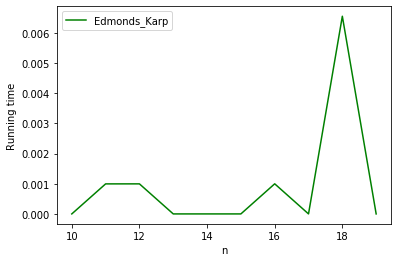

In [9]:
import random
import math
import time
import matplotlib.pyplot as plt



def generate_flow_network(n):
    # create empty graph
    graph = [[0] * (n+2) for i in range(n+2)]
    
    # set capacities for source and sink nodes
    i = 0
    while i < n:
        graph[0][i+1] =random.randint(0, math.floor(math.sqrt(n)))
        graph[i+1][n+1] =random.randint(0, math.floor(math.sqrt(n)))
        i += 1
    
    # set capacities for intermediate nodes
    i = 0
    while i < n:
        j = 0
        while j < n:
            if i != j:
                graph[i+1][j+1] = random.randint(0, math.floor(math.sqrt(n)))
            j += 1
        i += 1
    
    return graph


x1 = [10,11,12,13,14,15,16,17,18,19]

ye = []

for n in range(10, 20):
    
        
    K = generate_flow_network(n)
    m = Graph(K)
    source = 0; sink = n
    
    start_time = time.time()
    print ("The maximum flow for Edmonds Karp algorithm  %d " % m.Edmonds_Karp(source, sink))  
    end_time = time.time()
    ye.append(end_time - start_time)
plt.plot(x1, ye, color='green',label="Edmonds_Karp")
plt.xlabel("n")
plt.ylabel("Running time")
plt.legend()
plt.show()
    


n = 10, : max_flow Linear Programming = 20.999999998650228
n = 11, : max_flow Linear Programming = 23.999999988191554
n = 12, : max_flow Linear Programming = 23.999999998362377
n = 13, : max_flow Linear Programming = 23.999999998421494
n = 14, : max_flow Linear Programming = 29.999999998274227
n = 15, : max_flow Linear Programming = 28.99999999825333
n = 16, : max_flow Linear Programming = 33.99999999760015
n = 17, : max_flow Linear Programming = 43.999999999741604
n = 18, : max_flow Linear Programming = 44.999999997571315
n = 19, : max_flow Linear Programming = 41.99999999958612


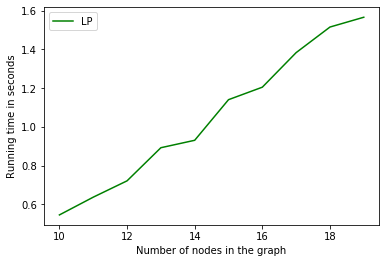

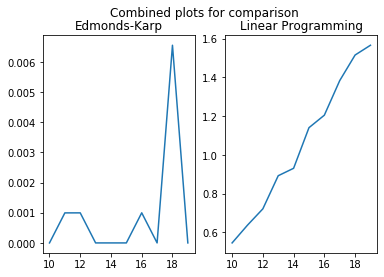

In [10]:
import random
import math
import networkx as nx
import cvxpy as cp

def random_capacities(n):
    return [random.randint(1, math.floor(math.sqrt(n))) for _ in range(n+2)]

def generate_flow(n):
    G = nx.DiGraph()
    for i in range(n+2):
        capacities = random_capacities(n)
        for j, capacity in enumerate(capacities):
            
            if capacity > 0:
                G.add_edge(i, j, capacity=capacity)
                
                
    return G

def max_flow_lp(G):
    n = len(G.nodes)
    capacities = nx.get_edge_attributes(G, 'capacity')
    flow = cp.Variable((n, n), nonneg=True)
    objective = cp.Maximize(cp.sum(flow[0, :]) - cp.sum(flow[:, n-1]))
    constraints = [
        flow[i, j] <= capacities[(i, j)]
        for (i, j) in capacities.keys()
    ]
    for i in range(1, n-1):
        constraints.append(cp.sum(flow[i, :]) - cp.sum(flow[:, i]) == 0)
    prob = cp.Problem(objective, constraints)
    result = prob.solve()
    
    return result
x2 = [10,11,12,13,14,15,16,17,18,19]
y_lp=[]

if __name__ == '__main__':
    for n in range(10, 20):
        
        G = generate_flow(n)
        start_timelp = time.time()
        max_flow = max_flow_lp(G)
        end_timelp = time.time()
        y_lp.append(end_timelp - start_timelp)
        print(f"n = {n}, : max_flow Linear Programming = {max_flow}")
   


   
plt.plot(x2, y_lp, color='green',label="LP")
plt.xlabel("Number of nodes in the graph")
plt.ylabel("Running time in seconds")
plt.legend()
plt.show()
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.plot(x1, ye)
ax1.set_title('Edmonds-Karp')
ax2.plot(x2, y_lp)
ax2.set_title('Linear Programming')
fig.suptitle('Combined plots for comparison')
plt.show()

# Conclusion: 

From the Comparison of both the plots regarding the run time, we can figure that Edmonds Karp algorithm is very much quicker than Linear Programming to get the Max-Flow of a Graph network.